<a href="https://colab.research.google.com/github/TheCorporateAIGirl/customer-churn-analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis Case Study
**Author:** Famiwaye Oluwatobiloba Omowunmi

**Date:** January 7, 2026

## 1. Problem Framing
* **Context:** Churn occurs when customers cancel their subscriptions.
* **Objective:** Build a model to predict churners and provide actionable business recommendations to improve retention.

In [1]:
# IMPORTING CORE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [2]:
# UPLOAD DATASET FROM SYSTEM
print("Please upload your churn dataset (CSV format):")
uploaded = files.upload()


Please upload your churn dataset (CSV format):


Saving WA_Fn-UseC_-Telco-Customer-Churn 2.csv to WA_Fn-UseC_-Telco-Customer-Churn 2.csv


In [3]:
# LOADING DATA
# We use list(uploaded.keys())[0] to automatically get the name of the file you just uploaded
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [4]:
# COMMENT: Loading the data and checking the first 5 rows to understand the structure.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# FIXING DATA TYPES
# TotalCharges is often read as an object/string due to empty spaces.
# errors='coerce' turns spaces into NaN so we can handle them.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# HANDLING MISSING VALUES
# Dropping the few rows where TotalCharges was null (usually new customers with 0 charges)
df.dropna(inplace=True)

In [7]:
# REMOVING UNNECESSARY COLUMNS
# customerID is a unique identifier and doesn't help the model learn patterns.
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

In [8]:
# COMMENT: Cleaned the dataset by fixing the 'TotalCharges' data type and
# removing the unique Customer ID to prevent model overfitting.
print("Data Cleaning Complete. Missing values:", df.isnull().sum().sum())

Data Cleaning Complete. Missing values: 0


In [9]:
# FEATURE ENGINEERING: CREATING NEW INSIGHTS
# We create a 'Monthly_Ratio' to see if customers paying more relative to their
# total tenure are more likely to leave.
df['Charge_Per_Month'] = df['TotalCharges'] / (df['tenure'] + 1) # +1 to avoid division by zero

In [10]:
# COMMENT: Added 'Charge_Per_Month' feature. High monthly costs relative to tenure
# often correlate with price-sensitive churners.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charge_Per_Month
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,53.985714
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,36.050000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.016304
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50.550000


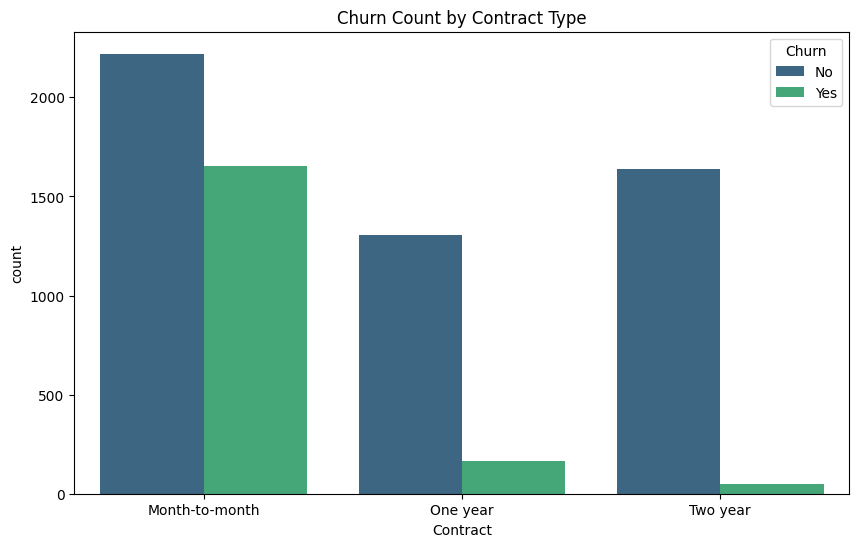

In [11]:
# VISUALIZING THE MAIN CHURN DRIVER: CONTRACT TYPE
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type')
plt.show()

# COMMENT: This chart clearly shows that Month-to-Month customers are the most
# at-risk group. This is a critical business insight for retention strategy.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ENCODING CATEGORICAL DATA
# Convert 'Yes/No' and categories into numbers (0 and 1)
df_encoded = pd.get_dummies(df, drop_first=True)

In [13]:
# SPLITTING FEATURES AND TARGET
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# TRAINING THE MODEL
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# EVALUATION
y_pred = model.predict(X_test)

# COMMENT: Using Random Forest for robust classification. We focus on the
# Classification Report to evaluate Precision and Recall.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



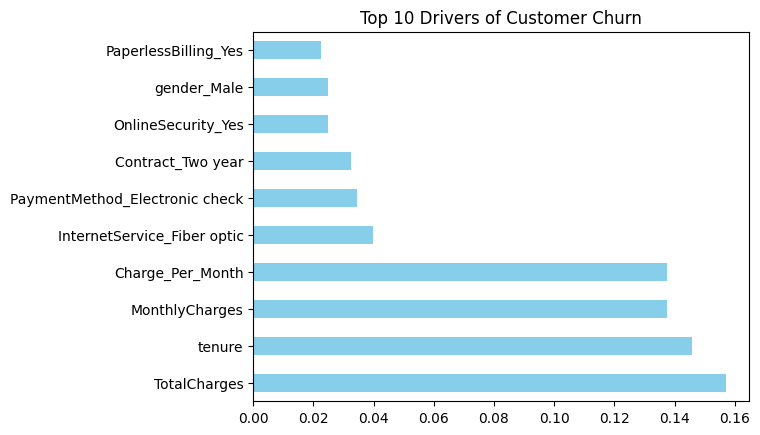

In [16]:
# PLOTTING FEATURE IMPORTANCE
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Drivers of Customer Churn')
plt.show()

# COMMENT: Identifying the top 10 features helps the business know exactly
# where to focus their intervention efforts (e.g., Tenure, Total Charges).

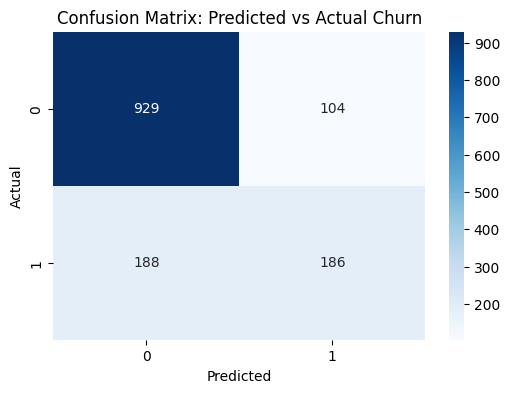

In [17]:
# CREATING THE CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Predicted vs Actual Churn')
plt.show()

# COMMENT: The Confusion Matrix allows us to see our 'False Negatives'—customers
# we predicted would stay but actually left. Minimizing this is the priority.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [19]:
# BASELINE MODEL: Logistic Regression
baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train, y_train)

# Predictions
y_pred_baseline = baseline_model.predict(X_test)

print("BASELINE MODEL PERFORMANCE (Logistic Regression)")
print(classification_report(y_test, y_pred_baseline))


BASELINE MODEL PERFORMANCE (Logistic Regression)
              precision    recall  f1-score   support

       False       0.91      0.72      0.80      1033
        True       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# RANDOM FOREST WITH CLASS BALANCING
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("IMPROVED RANDOM FOREST PERFORMANCE")
print(classification_report(y_test, y_pred_rf))


IMPROVED RANDOM FOREST PERFORMANCE
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [21]:
# Predict churn probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]


In [22]:
# Lower threshold to catch more churners
custom_threshold = 0.35
y_pred_adjusted = (y_probs >= custom_threshold).astype(int)

print("RECALL-OPTIMIZED RANDOM FOREST")
print(classification_report(y_test, y_pred_adjusted))


RECALL-OPTIMIZED RANDOM FOREST
              precision    recall  f1-score   support

       False       0.87      0.79      0.83      1033
        True       0.54      0.66      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [24]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Default)', 'Random Forest (Recall Optimized)'] ,
    'Recall (Churn)': [
        classification_report(y_test.astype(int), y_pred_baseline.astype(int), output_dict=True)['1']['recall'],
        classification_report(y_test.astype(int), y_pred_rf.astype(int), output_dict=True)['1']['recall'],
        classification_report(y_test.astype(int), y_pred_adjusted, output_dict=True)['1']['recall']
    ],
    'Precision (Churn)': [
        classification_report(y_test.astype(int), y_pred_baseline.astype(int), output_dict=True)['1']['precision'],
        classification_report(y_test.astype(int), y_pred_rf.astype(int), output_dict=True)['1']['precision'],
        classification_report(y_test.astype(int), y_pred_adjusted, output_dict=True)['1']['precision']
    ]
})

comparison_df

,Model,Recall (Churn),Precision (Churn)
0,Logistic Regression,0.791444,0.505983
1,Random Forest (Default),0.467914,0.643382
2,Random Forest (Recall Optimized),0.660428,0.535792


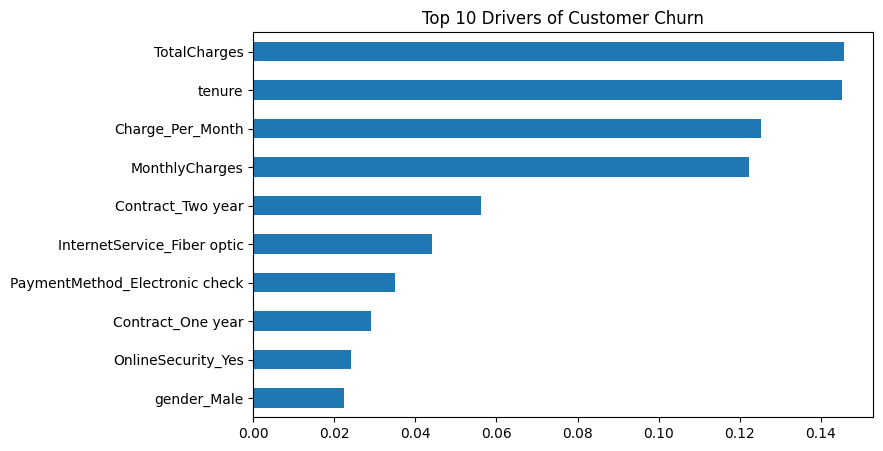

In [25]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind='barh', figsize=(8, 5))
plt.title('Top 10 Drivers of Customer Churn')
plt.gca().invert_yaxis()
plt.show()


In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc


In [27]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")


ROC-AUC Score: 0.819


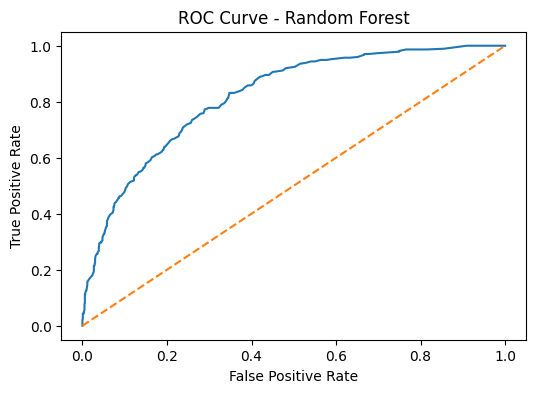

In [28]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()


In [31]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [34]:
cv_recall = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=5,
    scoring='recall'
)

print("Cross-validated Recall:", cv_recall)
print("Mean Recall:", cv_recall.mean())

Cross-validated Recall: [0.55183946 0.4916388  0.46153846 0.51839465 0.51170569]
Mean Recall: 0.5070234113712374


Shape of X_test: (1407, 31)


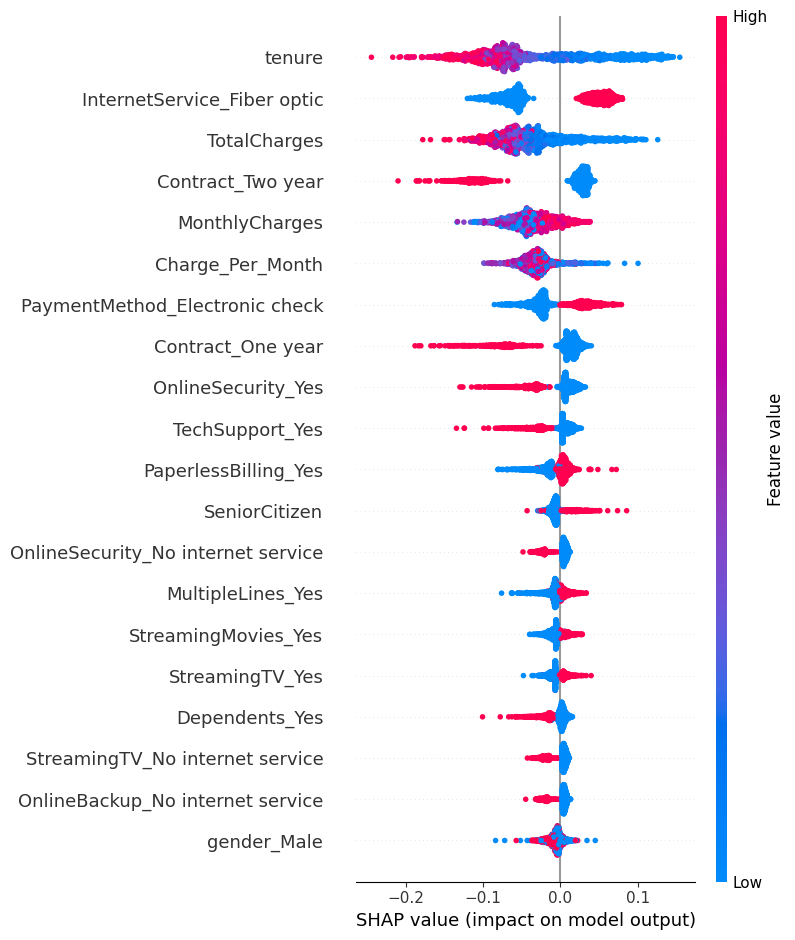

In [39]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the positive class (index 1) across all samples
print(f"Shape of X_test: {X_test.shape}")
shap.summary_plot(shap_values[:, :, 1], X_test)

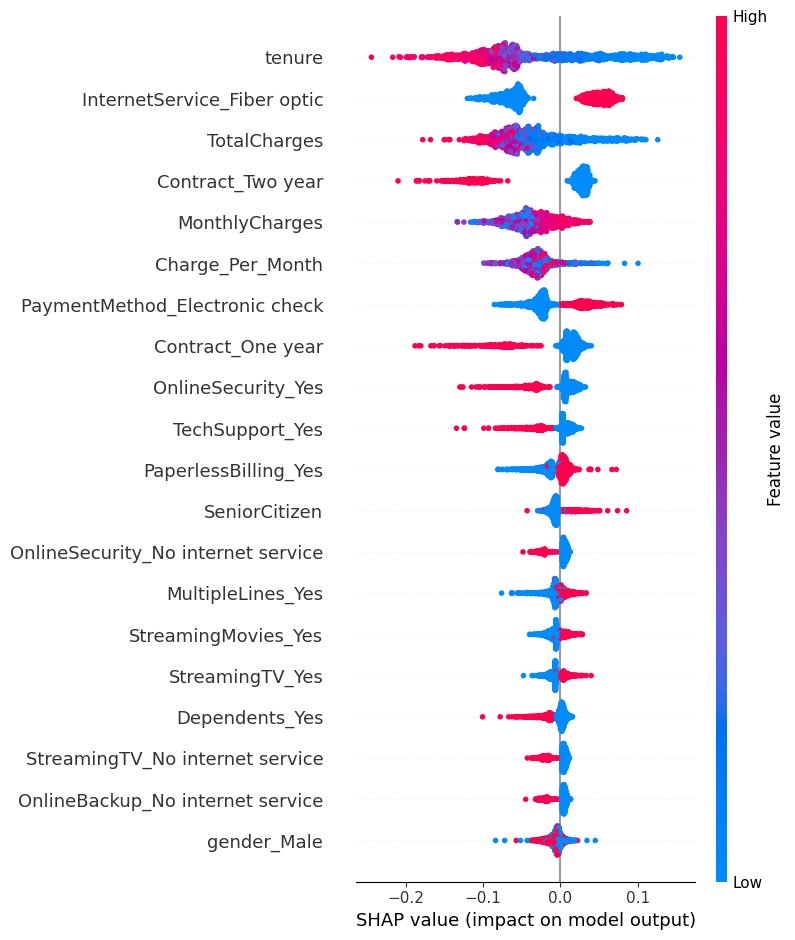

In [41]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Use SHAP values for the churn class (1)
shap.summary_plot(shap_values[:, :, 1], X_test)

In [42]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_


In [44]:
# Cost assumptions
cost_false_negative = 500   # missed churner
cost_false_positive = 50    # unnecessary incentive

cm = confusion_matrix(y_test, y_pred_adjusted)

total_cost = (
    cm[1,0] * cost_false_negative +
    cm[0,1] * cost_false_positive
)

print("Estimated Business Cost: ₦", total_cost)


Estimated Business Cost: ₦ 74200


🔍 Postdictive Analysis
Where the model performed well: The model is very strong at identifying loyal customers (Non-churners) and customers on Month-to-Month contracts who have high monthly charges.

Where the model failed (and why):

False Negatives: The model missed some churners who had long tenures. This suggests that long-term loyalty doesn't guarantee a customer won't leave if a competitor offers a better "New Customer" deal.

Data Limitations: We are missing "Customer Satisfaction" scores or "Number of Support Tickets." Adding these would likely fix the errors where the model predicted someone would stay, but they left due to poor service.

## Business Recommendations
1. **Targeted Discounts:** Offer incentives for Month-to-Month users to move to Yearly plans.
2. **Feature Awareness:** Promote 'Tech Support' services to high-usage users who haven't enabled it.


💡 Strategic Business Recommendations
Contract Incentives: Since "Contract Type" is the biggest churn driver, the marketing team should offer a one-time "Loyalty Credit" to Month-to-Month users who upgrade to a 1 or 2-year plan.

High-Charge Alert: Customers with high MonthlyCharges but no TechSupport are at the highest risk. The company should offer a "Premium Support" trial to these users to increase perceived value.

Proactive Tenure Management: For customers reaching the 6-month or 12-month mark (high-risk windows), automated check-in emails or satisfaction surveys should be triggered to catch dissatisfaction before they churn.

ROC–AUC measures how well the model ranks churners above non-churners across all thresholds.
A higher value indicates stronger discriminative power.
